## Equipo 48

| Nombre | Matrícula |
| ------ | --------- |
| André Zaragoza  | A01797076 |
| Héctor Santillán | A01633395 |
| Pablo de Jesus González | A01321850 |
| Delbert Custodio | A01795613 |
| Abel Diaz | A00566705 |

# Dataset a trabajar: Seoul Bike Sharing Demand

El dataset conocido como `Seoul Bike Sharing Demand` es una serie de registros los cuales fueron recabados en Febrero de 2020. El dataset contiene 13 columnas y 8760 registros en su formato original.

Las columnas o features que se encuentran en el dataset son los siguientes:

| Feature | Tipo | Notas |
| ------- | ---- | ----- |
| Date    | Temporal | Contiene la fecha en que se llevó a cabo un registro. Su formato es DD-MM-YYYY. |
| Rented Bike Count | Entero | Muestra la cantidad de bicicletas que se rentaron a cierta hora en cierta fecha. |
| Hour    | Temporal | Es la hora del día en que se registraron la cantidad de bicicletas rentadas respecto a la hora anterior. |
| Temperature(°C) | Continua | Es la temperatura en grados Celsius que se registró en cierta fecha y hora del ambiente. |
| Humidity(%) | Entero | Es la humedad relativa del ambiente (en %) registrada en la fecha y hora del registro. |
| Wind speed (m/s) | Continua | La velocidad del viento en m/s registrada en la fecha y hora correspondientes. |
| Visibility (10m) | Entero | Visibilidad en factores de 10 metros. |
| Dew point temperature(°C) | Continua | Es la temperatura en la cual el aire se satura de humedad. |
| Solar Radiation (MJ/m²)  | Continua | Cantidad o medida de radiación solar absorbida por unidad de área. | 
| Rainfall(mm) | Continua | Cantidad de lluvia registrada en milimetros. |
| Snowfall (cm) | Continua | Cantidad de nieve registrada, en milimetros. | 
| Seasons | Categorica, nominal. | La época o temporada del año. |
| Holiday | Binaria o Booleana | Indica si la fecha registada es una festividad. |
| Functioning Day | Binaria. | Indica si el servicio de renta de bicicletas operó o no en la fecha indicada. |

<br>
<br>

Respecto al dataset modificado, podemos encontrar una columna extra:

| Feature | Tipo | Notas |
| ------- | ---- | ----- |
| mixed_type_col | Desconocida | Debemos analizar la columna en nuestro EDA. |

# Problemática a resolver

Según la página de UCI sobre el dataset original, se introdujo la posibilidad de rentar bicicletas en distintas ciudades para mejorar la movilidad dentro de las zonas urbanas. Con esto, un aspecto importante es poder suplir la demanda de bicicletas que se puedan rentar a cualquier hora del día, ya que:

- El esperar mucho tiempo para rentar una bicicleta puede causar que el uso de éstas se reduzca.
- Utilizar una bicicleta para moverse dentro de una ciudad reduce el tráfico vehicular para evitar congestionamientos, por lo que es un indispensable cubrir la demanda de bicicletas que se necesiten durante el día y sobre todo a horas pico.

Por lo anterior, el dataset produce una base sólida para trabajar un modelo de regresión que pueda predecir la demanda de bicicletas que se tendrá por cada hora del día. Esta predicción ayudará a que las autoridades puedan mantener una oferta de bicicletas acorde a las necesidades de la población, y a planificar de mejor manera la cantida de bicicletas a adquirir y dar mantenimiento.

Por lo tanto, la variable a predecir para resolver la problemática es `Rented_Bike_Count`.

# Inicialización y Carga de Datos 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 1. Cargar el Dataset
#df = pd.read_csv('./csv/seoul_bike_sharing_original.csv')
df = pd.read_csv('./csv/seoul_bike_sharing_modified.csv')
print("Dataset cargado exitosamente. Las primeras 5 filas:")

df.head(5)

Dataset cargado exitosamente. Las primeras 5 filas:


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,mixed_type_col
0,01/12/2017,254.0,0.0,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,876
1,01/12/2017,204.0,1.0,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,798
2,01/12/2017,173.0,2.0,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,231
3,01/12/2017,107.0,3.0,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,bad
4,01/12/2017,78.0,4.0,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,536


In [2]:
# 2. Renombrar y Estandarizar Columnas
# Eliminaremos los espacios entre los nombres de los features para reemplazarlos por underscores (_)

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.rename(columns={'rented_bike_count': 'demanda'}, inplace=True)

# Imprimimos las nuevas columnas
print('Columnas a trabajar:\n')
df.dtypes

Columnas a trabajar:



date                         object
demanda                      object
hour                         object
temperature(°c)              object
humidity(%)                  object
wind_speed_(m/s)             object
visibility_(10m)             object
dew_point_temperature(°c)    object
solar_radiation_(mj/m2)      object
rainfall(mm)                 object
snowfall_(cm)                object
seasons                      object
holiday                      object
functioning_day              object
mixed_type_col               object
dtype: object

In [3]:
len(df)

8935

En este punto es posible darnos cuenta de que contamos con un dataset el cual:

- Contiene "ruido" en las variables de tipo numérico.
- Variablles o features que deberían ser binarios contienen valores extraños (`holiday` y `functioning_day` son un claro ejemplo de ésto).

# Limpieza de nuestro dataset

### Para `date`

Notamos que algunos valores de `date` tienen espacios en blanco que podrían darnos problemas más adelante. Por lo que procedemos a hacer un strip de las fechas.

In [4]:
def clean_date_column(value_to_clean):
    
    if value_to_clean is None or value_to_clean == '':
        return None
    
    cleaned = str(value_to_clean).strip()
    
    if cleaned.lower() == 'nan':
        return None
    
    return cleaned

df['date'] = df['date'].apply(clean_date_column)

### Limpieza de `holiday`, `functioning_day` y `seasons`

Notamos que los valores válidos para estos features son los siguientes:

- `Para holiday`: `No holiday` & `Holiday`.
- `Para functioning_day`: `Yes` & `No`.

In [5]:
print( f"Valores únicos para `holiday`: {df['holiday'].unique()}" )
print( f"Valores únicos para `functioning_day`: {df['functioning_day'].unique()}" )
print( f"Valores únicos para `seasons`: {df['seasons'].unique()}" )

Valores únicos para `holiday`: ['No Holiday' ' nO hOLIDAY ' nan ' hOLIDAY ' 'Holiday' ' NAN ']
Valores únicos para `functioning_day`: ['Yes' ' yES ' ' NAN ' nan 'No' ' nO ']
Valores únicos para `seasons`: ['Winter' ' wINTER ' nan ' NAN ' 'Spring' ' sPRING ' 'Summer' ' sUMMER '
 'Autumn' ' aUTUMN ']


#### Para `holiday`

Por lo tanto, ahora procedemos a trabajar sobre `Holiday` para asegurarnos que los valores en nuestro dataset sean correctos.

In [6]:
def correct_holiday_values( value_to_clean ):
    
    
    if ( (value_to_clean == 'nan') or (value_to_clean is None ) or (value_to_clean == '')):
        return None
    else:
        value_to_clean = str(value_to_clean).lower()
        value_to_clean = value_to_clean.strip()
    
        if value_to_clean == 'holiday':
            return 'yes'
        elif value_to_clean == 'no holiday':
            return 'no'
        
df['Holiday_or_not'] = df['holiday'].apply(correct_holiday_values)
print( f"Al aplicar nuestra función de limpieza tenemos los siguientes valores únicos en `holiday`: {df['Holiday_or_not'].unique()}")

Al aplicar nuestra función de limpieza tenemos los siguientes valores únicos en `holiday`: ['no' None 'yes']


In [7]:
# Copiamos los valores obtenidos para holiday y eliminamos la columna que usamos para limpiar esta data

df['holiday'] = df['Holiday_or_not']
df.drop(columns=['Holiday_or_not'], inplace=True)


In [8]:
# Ahora revisamos qué fechas tienen valores None en la columna de holiday para investigar si estos fueron días festivos en Seoul.

print( df.loc[df['holiday'].isna(), 'date'].unique() )

['10/12/2017' '17/12/2017' '19/12/2017' '20/12/2017' '21/12/2017'
 '22/12/2017' '23/12/2017' '26/12/2017' '29/12/2017' '30/12/2017'
 '05/01/2018' '09/01/2018' '14/01/2018' '19/01/2018' '21/01/2018'
 '23/01/2018' '27/02/2018' '28/02/2018' '01/03/2018' '18/03/2018'
 '20/03/2018' '21/03/2018' '23/03/2018' '09/04/2018' '16/04/2018' None
 '26/04/2018' '27/04/2018' '02/05/2018' '06/05/2018' '19/05/2018'
 '20/05/2018' '22/05/2018' '23/05/2018' '27/05/2018' '11/06/2018'
 '12/06/2018' '18/06/2018' '19/06/2018' '25/06/2018' '08/07/2018'
 '11/07/2018' '13/07/2018' '24/07/2018' '25/07/2018' '30/07/2018'
 '31/07/2018' '03/08/2018' '13/08/2018' '22/08/2018' '31/08/2018'
 '02/09/2018' '05/09/2018' '14/09/2018' '20/09/2018' '22/09/2018'
 '23/09/2018' '30/09/2018' '05/10/2018' '15/10/2018' '27/10/2018'
 '28/10/2018' '31/10/2018' '02/11/2018' '06/11/2018' '12/11/2018'
 '13/11/2018' '14/11/2018' '22/11/2018' '23/11/2018' '25/11/2018'
 '30/11/2018' '15/11/2018' '28/04/2018']


Y luego de una búsqueda rápida en internet, las siguientes fechas fueron festivas en Seoul:

- 01/03/2018
- 22/05/2018

In [9]:
# Entonces, procedemos a cambiar los valores None por 'yes' o 'no' con base en la fecha de registro.
# En este paso, existe un registro con fecha NaN que tomará el valor de 'no', pero esto podemos trabajarlo después.

festive_dates = ['01/03/2018', '22/05/2018']

df['holiday'] = [ 
                 'yes' if  (h is None and d in festive_dates)
                 else 'no' if (h is None and d not in festive_dates)
                 else h for d,h in zip(df['date'], df['holiday'])]

df['holiday'].unique()

array(['no', 'yes'], dtype=object)

#### Para `functioning_day`

Al correr el código de abajo es posible notar que no se encontró algún valor None o vacío en la columna `functioning_day` al usar una función similar al procesamiento de `holiday`, por lo que en este paso procedemos solamente a modificar los valores de `functioning_day` según lo obtenido por nuestra función.

In [10]:
def correct_functioning_day_values( value_to_clean):
    
    if ( (value_to_clean == 'nan') or (value_to_clean is None ) or (value_to_clean == '')):
        return None
    
    else:
        
        value_to_clean = str(value_to_clean).lower()
        value_to_clean = value_to_clean.strip()
    
        if value_to_clean == 'yes':
            return 'yes'
        else:
            return 'no'
        
df['functioning_day_or_not'] = df['functioning_day'].apply(correct_functioning_day_values)
print( f"Al aplicar nuestra función de limpieza tenemos los siguientes valores únicos en `functioning_day`: {df['functioning_day_or_not'].unique()}")

Al aplicar nuestra función de limpieza tenemos los siguientes valores únicos en `functioning_day`: ['yes' 'no']


In [11]:
df['functioning_day'] = df['functioning_day_or_not']
df.drop(columns=['functioning_day_or_not'], inplace=True)
df['functioning_day'].unique()

array(['yes', 'no'], dtype=object)

Y ahora procedemos a revisar la distribución de cada 

In [12]:
# # Convertir 'date' al tipo datetime
# df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# # Combinar fecha y hora en una sola columna para análisis de series de tiempo
# df['datetime'] = df['date'] + pd.to_timedelta(df['hour'], unit='h')
# df.set_index('datetime', inplace=True)
# df.drop(['date', 'hour'], axis=1, inplace=True)

# print("\n--- DataFrame después de la conversión de tipos ---")
# print(df.head())

#### Para `seasons`

In [13]:
df['seasons'].unique()

array(['Winter', ' wINTER ', nan, ' NAN ', 'Spring', ' sPRING ', 'Summer',
       ' sUMMER ', 'Autumn', ' aUTUMN '], dtype=object)

In [14]:
def correct_season_values( value_to_clean):
    
    if ( (value_to_clean == 'nan') or (value_to_clean is None ) or (value_to_clean == '')):
        return None
    
    else:
        value_to_clean = str(value_to_clean).strip().lower()
        
        if value_to_clean == 'nan':
            return None
        
        return value_to_clean
        
df['seasons_corrected'] = df['seasons'].apply(correct_season_values)
df['seasons_corrected'].unique()

array(['winter', None, 'spring', 'summer', 'autumn'], dtype=object)

In [15]:
df['seasons'] = df['seasons_corrected']
df.drop(columns=['seasons_corrected'], inplace=True)

print(f"Valores unicos para `seasons` luego de aplicar la corrección: {df['seasons'].unique()}")

Valores unicos para `seasons` luego de aplicar la corrección: ['winter' None 'spring' 'summer' 'autumn']


In [16]:
# Verificamos las fechas en donde tenemos None

print( df.loc[df['seasons'].isna(), 'date'].unique() )

['06/12/2017' '14/12/2017' '16/12/2017' '27/12/2017' '01/01/2018'
 '12/01/2018' '14/01/2018' '17/01/2018' '18/01/2018' '21/01/2018'
 '27/01/2018' '30/01/2018' '05/02/2018' '09/02/2018' '19/02/2018'
 '20/02/2018' '25/02/2018' '26/02/2018' '28/02/2018' None '02/03/2018'
 '05/03/2018' '08/03/2018' '22/03/2018' '26/03/2018' '27/03/2018'
 '29/03/2018' '02/04/2018' '04/04/2018' '14/04/2018' '16/04/2018'
 '18/04/2018' '21/04/2018' '22/04/2018' '11/05/2018' '24/05/2018'
 '10/06/2018' '18/06/2018' '25/06/2018' '28/06/2018' '29/06/2018'
 '07/07/2018' '08/07/2018' '16/07/2018' '18/07/2018' '19/07/2018'
 '22/07/2018' '25/07/2018' '31/07/2018' '01/08/2018' '02/08/2018'
 '07/08/2018' '10/08/2018' '22/08/2018' '29/08/2018' '02/09/2018'
 '03/09/2018' '11/09/2018' '13/09/2018' '17/09/2018' '18/09/2018'
 '13/10/2018' '14/10/2018' '17/10/2018' '24/10/2018' '04/11/2018'
 '08/11/2018' '10/11/2018' '13/11/2018' '19/11/2018' '20/11/2018'
 '23/11/2018' '29/11/2018' '30/11/2018' '07/05/2018' '04/08/2018']


Y luego de una búsqueda rápida en Internet obtenemos cuales fechas pertenecen al invierno, verano, otoño y primavera en Seoul.

In [17]:
winter_dates = [
'06/12/2017', '14/12/2017', '16/12/2017', '27/12/2017', '01/01/2018',
'12/01/2018', '14/01/2018', '17/01/2018', '18/01/2018', '21/01/2018',
'27/01/2018', '30/01/2018', '05/02/2018', '09/02/2018', '19/02/2018',
'20/02/2018', '25/02/2018', '26/02/2018', '28/02/2018'
]

spring_dates = [
'02/03/2018', '05/03/2018', '08/03/2018', '22/03/2018', '26/03/2018',
'27/03/2018', '29/03/2018', '02/04/2018', '04/04/2018', '14/04/2018',
'16/04/2018', '18/04/2018', '21/04/2018', '22/04/2018', '07/05/2018',
'11/05/2018', '24/05/2018'
]

summer_dates = [
'10/06/2018', '18/06/2018', '25/06/2018', '28/06/2018', '29/06/2018',
'07/07/2018', '08/07/2018', '16/07/2018', '18/07/2018', '19/07/2018',
'22/07/2018', '25/07/2018', '31/07/2018', '01/08/2018', '02/08/2018',
'04/08/2018', '07/08/2018', '10/08/2018', '22/08/2018', '29/08/2018'
]

autumn_dates = [
'02/09/2018', '03/09/2018', '11/09/2018', '13/09/2018', '17/09/2018',
'18/09/2018', '13/10/2018', '14/10/2018', '17/10/2018', '24/10/2018',
'04/11/2018', '08/11/2018', '10/11/2018', '13/11/2018', '19/11/2018',
'20/11/2018', '23/11/2018', '29/11/2018', '30/11/2018'
]



df['seasons'] = [ 
                      'winter' if (s is None and d in winter_dates)
                 else 'spring' if (s is None and d in spring_dates)
                 else 'summer' if (s is None and d in summer_dates)
                 else 'autumn' if (s is None and d in autumn_dates)
                 else s for d,s in zip(df['date'], df['seasons'])]

df['seasons'].unique()

array(['winter', 'spring', None, 'summer', 'autumn'], dtype=object)

Y verificamos que solamente las columnas que tengan `None` en `Date` deben aparecer con valores nulos.

In [18]:
print( df.loc[df['seasons'].isna(), 'date'].unique() )

[None]


### Variables numéricas

#### Para `Rented_bikes`

In [19]:
import numpy as np

def check_if_numeric_value ( value_to_check):
    
    try:
        float(value_to_check)
        return float(value_to_check)
    except:
        return np.nan
    
    
df['clean_demanda'] = df['demanda'].apply(check_if_numeric_value)

In [20]:
df['clean_demanda'].isna().value_counts()

clean_demanda
False    8799
True      136
Name: count, dtype: int64

Al revisar la cantidad de valores nulos o vacíos en la variable objetivo `demanda`, es posible calcular que el 1.52% de los registros no tiene un valor válido. Entonces, hemos decidido eliminar estos registros ya que:

- Al ser `demanda` la variable objetivo o a predecir, el imputar o agregar valores podría introducir sesgos bastante fuertes en nuestro modelo.

Por lo anterior, decidimos utilizar solo información real.

In [21]:
df.dropna(subset=['clean_demanda'], inplace=True)
df['clean_demanda'].isna().value_counts()

clean_demanda
False    8799
Name: count, dtype: int64

### Para `mixed_type_col`

In [22]:
# len(df['mixed_type_col'].unique())

In [23]:
# df['mixed_type_col'].value_counts().head(20)

In [24]:
# df['mixed_type_col'].isna().sum() / len(df) * 100

Al revisar el Top 20 de valores, notamos que no existe alguna ventaja en mantener la columna `mixed_type_column`. Nuestros criterios son los siguientes:

- El 9.5% de los datos es vacío o nulo.
- El top 20 de valores únicos muestra una mezcla de valores categóricos y numéricos.
- El nombre de la columna no nos da información extra para comprender lo que quiere decir.
- No fue posible hallar alguna documentación sobre cómo se creó esta columna en el sitio oficial de UCI para el dataset en cuestión.

In [25]:
# df.drop(columns=['mixed_type_col'], inplace= True)
# df.dtypes

### Para `temperature`, `humidity`, `wind_speed`, `solar_radiation`, `rainfall`, `snowfall`, `dew_point` y `visibility_(10m)`

In [26]:
weather_cols = [
    'temperature(°c)', 'humidity(%)', 'wind_speed_(m/s)', 'visibility_(10m)', 'dew_point_temperature(°c)', 'solar_radiation_(mj/m2)', 'rainfall(mm)', 'snowfall_(cm)'
]

In [27]:
df.isna().sum() / len(df) * 100

date                         0.943289
demanda                      0.000000
hour                         1.272872
temperature(°c)              1.011479
humidity(%)                  1.091033
wind_speed_(m/s)             1.386521
visibility_(10m)             1.022844
dew_point_temperature(°c)    1.125128
solar_radiation_(mj/m2)      0.977384
rainfall(mm)                 0.897829
snowfall_(cm)                1.113763
seasons                      0.034095
holiday                      0.000000
functioning_day              0.000000
mixed_type_col               9.512445
clean_demanda                0.000000
dtype: float64

Notamos que el porcentaje de valores nulos en cada una de éstas variables es bajo (no se supera el 5% de los datos), por lo que tenemos algunas estrategias para rellenar esta data:

- Utilizar una medida de tendencia central como la `media` o `mediana`. Esto ignora los patrones climatológicos, por lo que no es la mejor estrategia.
- Buscar una manera de tomar en cuenta la hora del día y la temporada (`season`) para calcular el promedio.
- Usar alguna técnica como Forward-Fill o Backward-Fill, lo que en algunos estudios se recomienda para data que se encuentra ordenada con base al tiempo.


Por lo anterior, hemos decidido utilizar forwardfill y backwardfill en estas variables, ya que:

- Las mismas dependen del mes, día y hora.
- Están correlacionadas fuertemente con la fecha (ejemplo: en Seoul siempre llueve en invierno, llueve o no llueve en verano, etc.)


Pero antes de trabajar con los valores vacíos, debemos asegurarnos de que estas columnas no contengan alguna mezcla de tipos de datos (texto y numeros, por ejemplo).

In [28]:
# Primero chequearemos cuales registros no cuentan con un valor válido en alguna de estas columnas, y colocaremos NaN en donde no se encuentra algún valor
# numérico.

for col in weather_cols:
    df[ f"{col}" ] = df[ f"{col}"].apply(check_if_numeric_value)
    
for col in weather_cols:
    nan_count = df[col].isna().sum()
    total = len(df)
    print(f"{col} : {nan_count:>4} NaN ({nan_count/total*100:>5.2f}%)")

temperature(°c) :  116 NaN ( 1.32%)
humidity(%) :  129 NaN ( 1.47%)
wind_speed_(m/s) :  157 NaN ( 1.78%)
visibility_(10m) :  130 NaN ( 1.48%)
dew_point_temperature(°c) :  129 NaN ( 1.47%)
solar_radiation_(mj/m2) :  109 NaN ( 1.24%)
rainfall(mm) :  114 NaN ( 1.30%)
snowfall_(cm) :  125 NaN ( 1.42%)


<Axes: >

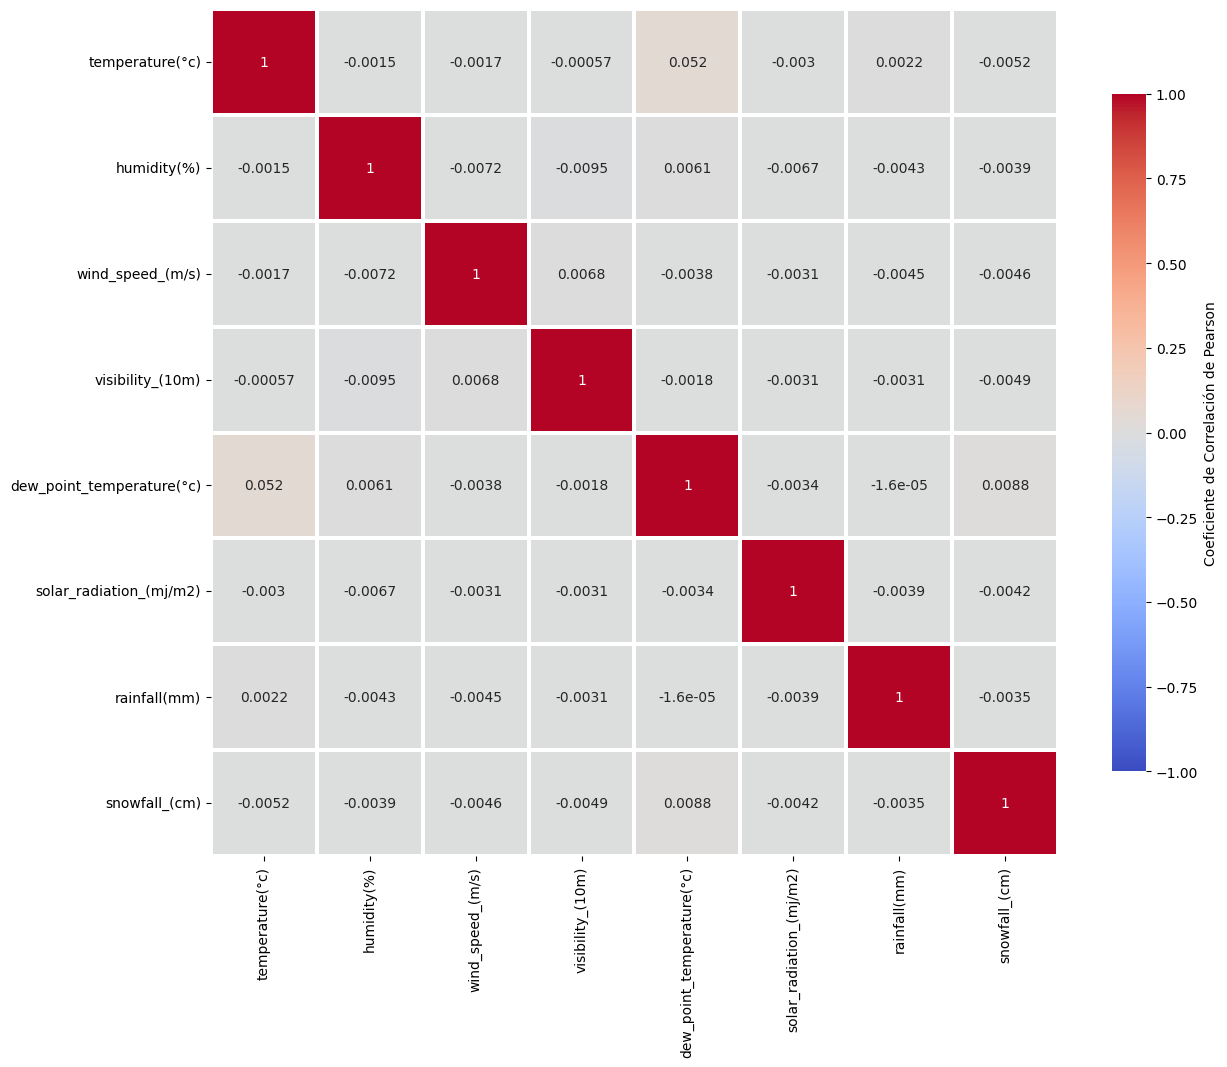

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df[weather_cols].corr(method='pearson')

plt.figure(figsize=(14, 11))

# Create heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,              
    cmap='coolwarm',         
    square=True,             
    linewidths=1.5,          
    linecolor='white',       
    cbar_kws={
        'shrink': 0.8,
        'label': 'Coeficiente de Correlación de Pearson'
    },
    vmin=-1,                 
    vmax=1,                  
    annot_kws={'size': 10}
)

Ahora haremos una matriz de correlación de Pearson para confirmar si existe alguna correlación fuerte entre nuestras variables de clima. Esto ayudará a que luego de hacer la estrategia de imputación podamos comprobar si las correlaciones se siguen manteniendo.

In [30]:
# Y ahora trabajamos en usar un ForwarFill seguido de un backwardfill
for col in weather_cols:
    
    df[f"{col}"] = df[f"{col}"].fillna(method= 'ffill')
    df[f"{col}"] = df[f"{col}"].fillna(method= 'bfill')

for col in weather_cols:
    print( f"Cantidad de registros NaN de la columna: {df[f"{col}"].isna().value_counts()}")
    print("\n")

Cantidad de registros NaN de la columna: temperature(°c)
False    8799
Name: count, dtype: int64


Cantidad de registros NaN de la columna: humidity(%)
False    8799
Name: count, dtype: int64


Cantidad de registros NaN de la columna: wind_speed_(m/s)
False    8799
Name: count, dtype: int64


Cantidad de registros NaN de la columna: visibility_(10m)
False    8799
Name: count, dtype: int64


Cantidad de registros NaN de la columna: dew_point_temperature(°c)
False    8799
Name: count, dtype: int64


Cantidad de registros NaN de la columna: solar_radiation_(mj/m2)
False    8799
Name: count, dtype: int64


Cantidad de registros NaN de la columna: rainfall(mm)
False    8799
Name: count, dtype: int64


Cantidad de registros NaN de la columna: snowfall_(cm)
False    8799
Name: count, dtype: int64




/tmp/ipykernel_12218/3485582612.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[f"{col}"] = df[f"{col}"].fillna(method= 'ffill')
/tmp/ipykernel_12218/3485582612.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[f"{col}"] = df[f"{col}"].fillna(method= 'bfill')


Ahora comprobamos que las correlaciones no se hayan modificado demasiado al usar `ffill` y `bfill`.

<Axes: >

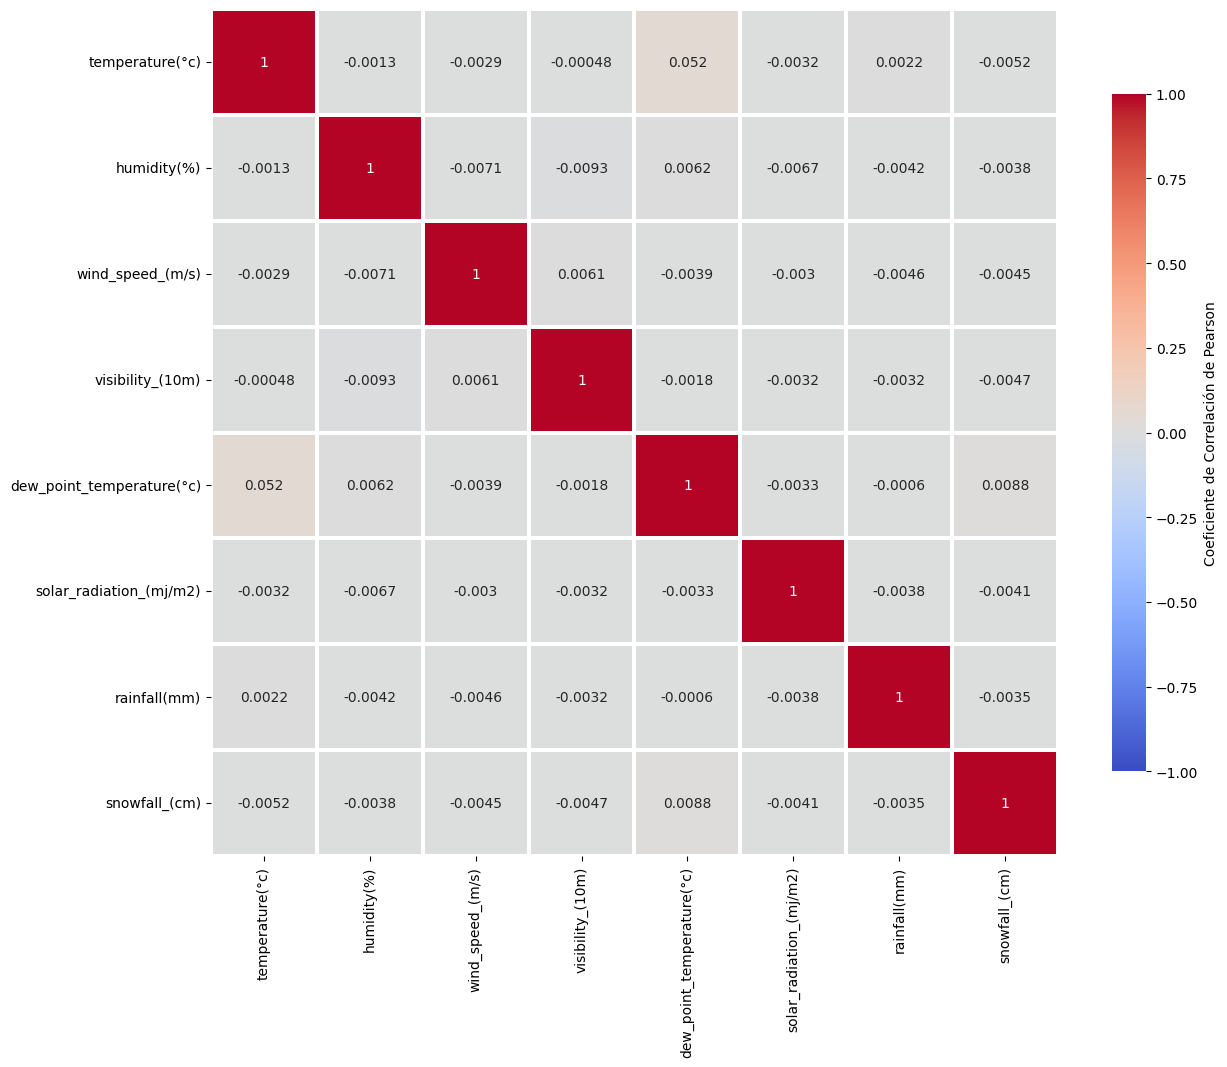

In [32]:
correlation_matrix = df[weather_cols].corr(method='pearson')

plt.figure(figsize=(14, 11))

# Create heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,              
    cmap='coolwarm',         
    square=True,             
    linewidths=1.5,          
    linecolor='white',       
    cbar_kws={
        'shrink': 0.8,
        'label': 'Coeficiente de Correlación de Pearson'
    },
    vmin=-1,                 
    vmax=1,                  
    annot_kws={'size': 10}
)

Por último, notamos que ya no contamos con valores NaN en nuestras columnas de clima luego de usar `ffill` y `bfill` en nuestro dataset.

In [33]:
df.isna().sum() / len(df) * 100

date                         0.943289
demanda                      0.000000
hour                         1.272872
temperature(°c)              0.000000
humidity(%)                  0.000000
wind_speed_(m/s)             0.000000
visibility_(10m)             0.000000
dew_point_temperature(°c)    0.000000
solar_radiation_(mj/m2)      0.000000
rainfall(mm)                 0.000000
snowfall_(cm)                0.000000
seasons                      0.034095
holiday                      0.000000
functioning_day              0.000000
mixed_type_col               9.512445
clean_demanda                0.000000
dtype: float64

# Exploratory Data Analysis (EDA)

In [ ]:
print("\n--- Información General y Tipos de Datos ---")
df.info()

print("\n\n--- Estadísticas Descriptivas de Variables Numéricas ---")
print(df.describe().T)

print("\n--- Conteo de Valores Únicos en Variables Categóricas/Discretas ---")
print(df['seasons'].value_counts())
print(df['holiday'].value_counts())
print(df['functioning_day'].value_counts())

# Limpieza y Transformación de Datos

In [ ]:
# 1. Verificar Nulos (Métricas)
print("\n--- Conteo de Valores Nulos por Columna ---")
print(df.isnull().sum())
# Si aparecen nulos, la acción recomendada (imputación con media/mediana o eliminación) depende de la cantidad.

# 2. Manejo de Inconsistencias
# Las variables 'functioning_day' deben ser binarias (Yes/No o Fun/NoFunc)
# En este dataset son 'Yes' y 'No', lo cual es consistente.

# Convertir 'functioning_day' y 'holiday' a numérico (0 y 1)
df['functioning_day'] = df['functioning_day'].map({'Yes': 1, 'No': 0})
df['holiday'] = df['holiday'].map({'No Holiday': 0, 'Holiday': 1})

In [ ]:
# Aplicar la detección de outliers en la variable 'demanda'
Q1 = df['demanda'].quantile(0.25)
Q3 = df['demanda'].quantile(0.75)
IQR = Q3 - Q1

limite_superior = Q3 + 1.5 * IQR

# 1. Conteo de Outliers
outliers_count = df[df['demanda'] > limite_superior].shape[0]
print(f"\n--- Detección de Outliers en Demanda ---")
print(f"Límite Superior (1.5*IQR): {limite_superior:.0f}")
print(f"Número de outliers detectados: {outliers_count}")

# 2. Opción de Limpieza (Imputación por tope o 'Capping')
# En lugar de eliminar, reemplazamos los outliers con el límite superior (Capping).
# Esto es común en modelos de regresión para mantener el tamaño del dataset.
df['demanda_limpia'] = np.where(
    df['demanda'] > limite_superior,
    limite_superior,
    df['demanda']
)

# Comparación del máximo antes y después
print(f"Máximo de Demanda (Original): {df['demanda'].max()}")
print(f"Máximo de Demanda (Limpia): {df['demanda_limpia'].max():.0f}")

# Se puede eliminar la columna original 'demanda' si solo se usará la 'demanda_limpia'
df.drop('demanda', axis=1, inplace=True)
df.rename(columns={'demanda_limpia': 'demanda'}, inplace=True)

### Buscamos algunas relaciones

# Transformaciones Finales (Feature Engineering)

In [ ]:
# Aplicar One-Hot Encoding a la variable 'seasons'
df_encoded = pd.get_dummies(df, columns=['seasons'], prefix='season')

print("\n--- DataFrame después del One-Hot Encoding de 'seasons' ---")
print(df_encoded.head())

In [ ]:
# Crear variables adicionales de tiempo
df_encoded['month'] = df_encoded.index.month
df_encoded['day_of_week'] = df_encoded.index.day_of_week # 0=Lunes, 6=Domingo
df_encoded['is_weekend'] = df_encoded['day_of_week'].apply(lambda x: 1 if x >= 5 else 0) # Sábado y Domingo

print("\n--- DataFrame después del Feature Engineering ---")
print(df_encoded.head())